In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
COIN_BLOCK_INFO_PATH = "coin_block_info"

coin = "SPD"
coin_per_block = 15
our_nethash = 540

fname = os.path.join(COIN_BLOCK_INFO_PATH, coin+"_block_info.csv")

In [3]:
df = pd.read_csv(fname)

In [4]:
df['date'] = pd.to_datetime(df['time'],unit='s')

In [5]:
print("Number of Blocks: {}".format(df.count()[0]))

Number of Blocks: 2000


In [6]:
print("Latest Block: {}".format(int(df["height"][0])))

Latest Block: 150951


In [7]:
df.head(10)

,difficulty,flags,height,nonce,time,date
0,3879.878876,proof-of-work,150951.0,3.258644e+09,1.525668e+09,2018-05-07 04:43:50
1,6523.944350,proof-of-work,150950.0,4.006044e+09,1.525668e+09,2018-05-07 04:43:47
2,56612.426811,proof-of-stake,150949.0,0.000000e+00,1.525668e+09,2018-05-07 04:43:44
3,51160.235378,proof-of-stake stake-modifier,150948.0,0.000000e+00,1.525668e+09,2018-05-07 04:43:12
4,67455.658238,proof-of-stake,150947.0,0.000000e+00,1.525668e+09,2018-05-07 04:42:08
5,5533.269638,proof-of-work,150946.0,4.204364e+09,1.525668e+09,2018-05-07 04:39:13
6,60959.502661,proof-of-stake,150945.0,0.000000e+00,1.525668e+09,2018-05-07 04:39:12
7,4611.054071,proof-of-work stake-modifier,150944.0,2.474085e+09,1.525668e+09,2018-05-07 04:38:24
8,44251.790307,proof-of-stake,150943.0,0.000000e+00,1.525668e+09,2018-05-07 04:38:08
9,123904.502207,proof-of-stake,150942.0,0.000000e+00,1.525668e+09,2018-05-07 04:37:52


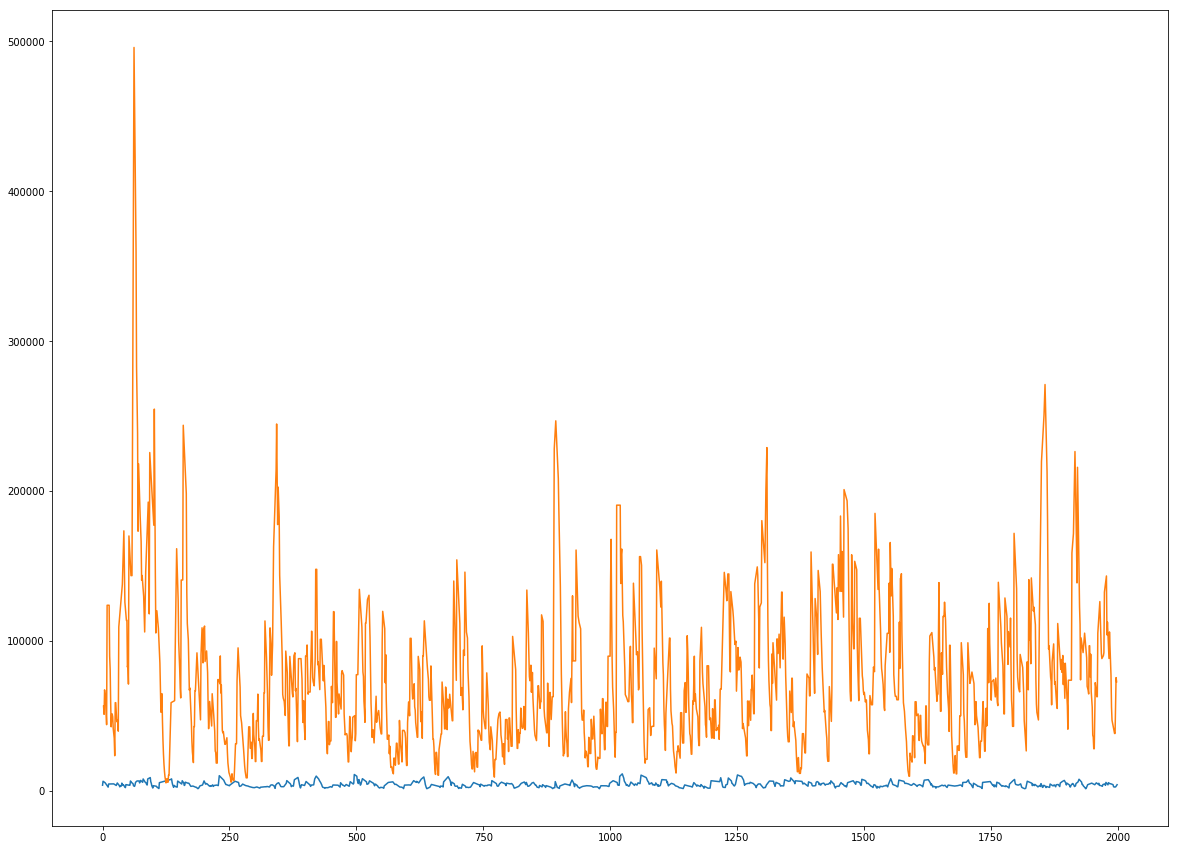

In [8]:
fig = plt.figure(figsize=(20,15))
plt.plot(df['difficulty'][df['flags'].str.contains("proof-of-work")])
plt.plot(df['difficulty'][df['flags'].str.contains("proof-of-stake")])

# plt.plot(df_pow_nethash_block_profit['height'], 
#          [np.mean(df_pow_nethash_block_profit['block_per_day'])]*df_pow_nethash_block_profit['height'].count(), 
#          linestyle = '--', linewidth = 1)

In [9]:
df_type = df.groupby("flags").size().reset_index(name='counts')
df_type["percentage"]=df_type["counts"]/sum(df_type["counts"])
df_type

,flags,counts,percentage
0,proof-of-stake,922,0.461
1,proof-of-stake stake-modifier,334,0.167
2,proof-of-work,542,0.271
3,proof-of-work stake-modifier,202,0.101


In [10]:
df_pow_block_rate = df[['flags','height','time']][df['flags'].str.contains("proof-of-work")].reset_index()
df_pow_block_rate.head(10)

,index,flags,height,time
0,0,proof-of-work,150951.0,1.525668e+09
1,1,proof-of-work,150950.0,1.525668e+09
2,5,proof-of-work,150946.0,1.525668e+09
3,7,proof-of-work stake-modifier,150944.0,1.525668e+09
4,10,proof-of-work,150941.0,1.525668e+09
5,11,proof-of-work,150940.0,1.525668e+09
6,12,proof-of-work,150939.0,1.525668e+09
7,22,proof-of-work,150929.0,1.525668e+09
8,27,proof-of-work stake-modifier,150924.0,1.525667e+09
9,29,proof-of-work,150922.0,1.525667e+09


In [11]:
df_pos_block_rate = df[['flags','height','time']][df['flags'].str.contains("proof-of-stake")].reset_index()
df_pos_block_rate.head(10)

,index,flags,height,time
0,2,proof-of-stake,150949.0,1.525668e+09
1,3,proof-of-stake stake-modifier,150948.0,1.525668e+09
2,4,proof-of-stake,150947.0,1.525668e+09
3,6,proof-of-stake,150945.0,1.525668e+09
4,8,proof-of-stake,150943.0,1.525668e+09
5,9,proof-of-stake,150942.0,1.525668e+09
6,13,proof-of-stake,150938.0,1.525667e+09
7,14,proof-of-stake stake-modifier,150937.0,1.525668e+09
8,15,proof-of-stake,150936.0,1.525668e+09
9,16,proof-of-stake,150935.0,1.525668e+09


In [12]:
MA_window = min(400, int((df_pow_block_rate.count()[0]-1)*0.5))
print("MA Windows = {}".format(MA_window))

MA Windows = 371


In [13]:
df_pow_count = df_pow_block_rate.count()[0]
df_pos_count = df_pos_block_rate.count()[0]
print("Num of POW = {}".format(df_pow_count))
print("Num of POS = {}".format(df_pos_count))

Num of POW = 744
Num of POS = 1256


In [14]:
df_pow_block_rate['pow_index'] = pd.DataFrame(range(df_pow_count)[::-1])
df_pow_block_rate.tail(5)

,index,flags,height,time,pow_index
739,1991,proof-of-work,148960.0,1.525590e+09,4
740,1992,proof-of-work,148959.0,1.525590e+09,3
741,1993,proof-of-work,148958.0,1.525590e+09,2
742,1996,proof-of-work,148955.0,1.525590e+09,1
743,1999,proof-of-work,148952.0,1.525590e+09,0


In [15]:
df_pos_block_rate['pos_index'] = pd.DataFrame(range(df_pos_count)[::-1])
df_pos_block_rate.tail(5)

,index,flags,height,time,pos_index
1251,1990,proof-of-stake,148961.0,1.525590e+09,4
1252,1994,proof-of-stake,148957.0,1.525590e+09,3
1253,1995,proof-of-stake,148956.0,1.525590e+09,2
1254,1997,proof-of-stake,148954.0,1.525590e+09,1
1255,1998,proof-of-stake,148953.0,1.525590e+09,0


In [16]:
df_pow_block_rate_window = df_pow_block_rate[["time", "pow_index"]].diff(-MA_window)
df_pow_block_rate_window.head(5)

,time,pow_index
0,39408.0,371.0
1,39464.0,371.0
2,39339.0,371.0
3,39391.0,371.0
4,39394.0,371.0


In [17]:
df_pos_block_rate_window = df_pos_block_rate[["time", "pos_index"]].diff(-MA_window)
df_pos_block_rate_window.head(5)

,time,pos_index
0,22640.0,371.0
1,22608.0,371.0
2,22576.0,371.0
3,22432.0,371.0
4,22752.0,371.0


In [18]:
df_pow_block_rate_window['block_per_day']=df_pow_block_rate_window['pow_index']/df_pow_block_rate_window['time']*3600*24
df_pow_block_rate_window.head(20)

,time,pow_index,block_per_day
0,39408.0,371.0,813.398295
1,39464.0,371.0,812.244071
2,39339.0,371.0,814.824983
3,39391.0,371.0,813.749334
4,39394.0,371.0,813.687364
5,39582.0,371.0,809.822647
6,39603.0,371.0,809.393228
7,39695.0,371.0,807.517320
8,39649.0,371.0,808.454185
9,39690.0,371.0,807.619048


In [19]:
df_pos_block_rate_window['block_per_day']=df_pos_block_rate_window['pos_index']/df_pos_block_rate_window['time']*3600*24
df_pos_block_rate_window.head(5)

,time,pos_index,block_per_day
0,22640.0,371.0,1415.830389
1,22608.0,371.0,1417.834395
2,22576.0,371.0,1419.844082
3,22432.0,371.0,1428.958631
4,22752.0,371.0,1408.860759


In [20]:
df_pow_block_rate_count = df_pow_block_rate_window.count()[0]
print(df_pow_block_rate_count)

373


In [21]:
df_pow_block_rate_full = pd.concat([df_pow_block_rate["height"].head(df_pow_block_rate_count), df_pow_block_rate_window['block_per_day']],axis=1)

In [22]:
df_pow_block_rate_full.head(3)

,height,block_per_day
0,150951.0,813.398295
1,150950.0,812.244071
2,150946.0,814.824983


In [23]:
COIN_NETHASH_INFO_PATH = "coin_nethash_info"
fname = os.path.join(COIN_NETHASH_INFO_PATH, coin+"_nethash_info.csv")

In [24]:
df_nethash = pd.read_csv(fname)

In [25]:
print("Number of Nethash Sample: {}".format(df_nethash.count()[0]))

Number of Nethash Sample: 1821


In [26]:
print("Latest Block: {}".format(int(df_nethash["height"][0])))

Latest Block: 150588


In [27]:
df_nethash.head(10)

,height,nethash
0,150588,335420
1,150587,237649
2,150586,237649
3,150585,237649
4,150584,237649
5,150580,198246
6,150579,137192
7,150577,148013
8,150575,148013
9,150574,340645


In [28]:
df_nethash[["nethash"]].rolling(window=2).mean()


,nethash
0,NaN
1,286534.5
2,237649.0
3,237649.0
4,237649.0
5,217947.5
6,167719.0
7,142602.5
8,148013.0
9,244329.0


In [29]:
df_pow_nethash_block = pd.merge(df_pow_block_rate_full, df_nethash, how='inner', on='height')
df_pow_nethash_block.head(20)

,height,block_per_day,nethash
0,150588,812.305821,335420
1,150580,812.985695,198246
2,150579,813.398295,137192
3,150575,811.154693,148013
4,150573,812.100023,340645
5,150564,819.721768,314002
6,150563,816.859917,208938
7,150544,823.660611,226085
8,150541,820.750224,147936
9,150535,820.288149,191896


In [30]:
df_pow_nethash_block["profit"]=df_pow_nethash_block["block_per_day"]*our_nethash/df_pow_nethash_block["nethash"]*coin_per_block
df_pow_nethash_block_profit = df_pow_nethash_block
df_pow_nethash_block_profit.head(5)

,height,block_per_day,nethash,profit
0,150588,812.305821,335420,19.616234
1,150580,812.985695,198246,33.217236
2,150579,813.398295,137192,48.024128
3,150575,811.154693,148013,44.390378
4,150573,812.100023,340645,19.310456


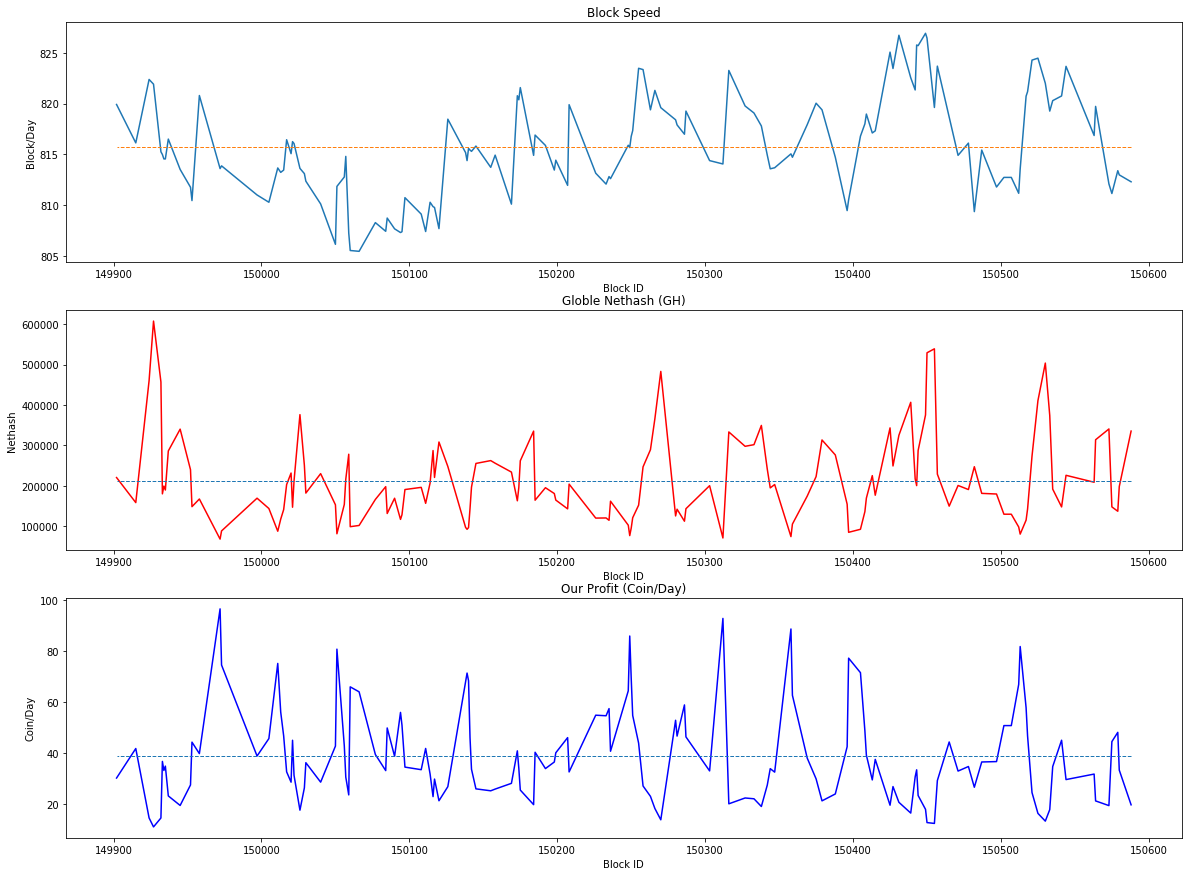

In [31]:
fig = plt.figure(figsize=(20,15))
plt.subplot(3, 1, 1)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['block_per_day'])
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['block_per_day'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)

plt.title('Block Speed')
plt.xlabel('Block ID')
plt.ylabel('Block/Day')

plt.subplot(3, 1, 2)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['nethash'], color='red')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['nethash'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Globle Nethash (GH)')
plt.xlabel('Block ID')
plt.ylabel('Nethash')

plt.subplot(3, 1, 3)
plt.plot(df_pow_nethash_block_profit['height'], df_pow_nethash_block_profit['profit'], color='blue')
plt.plot(df_pow_nethash_block_profit['height'], 
         [np.mean(df_pow_nethash_block_profit['profit'])]*df_pow_nethash_block_profit['height'].count(), 
         linestyle = '--', linewidth = 1)
plt.title('Our Profit (Coin/Day)')
plt.xlabel('Block ID')
plt.ylabel('Coin/Day')

plt.show()
